# Limits of K-means clustering

In [1]:
import numpy as np
from skimage import img_as_ubyte
import matplotlib.pyplot as plt

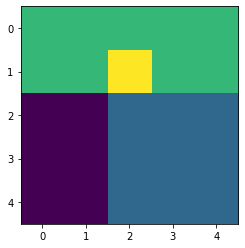

In [2]:
# Image cadre (couleurs à affecter)
c = np.array([
    [2, 2, 2, 2, 2],
    [2, 2, 3, 2, 2],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1],
])

# Couleurs types
colors = np.array([
    [76, 198, 244],
    [255, 153, 51],
    [210, 76, 180],
    [0, 128, 50],
])/255

# Affichage
plt.figure()
plt.imshow(c)
plt.show()

In [3]:
# Image non bruitée
M, N = c.shape
img = np.zeros((M,N,3))
for m in range(M):
    for n in range(N):
        img[m,n,:] = colors[c[m,n]]        
        
# Image bruitée
img += np.random.normal(0,.07,img.shape)
img = np.clip(img, 0, 1)
img = img_as_ubyte(img)

In [4]:
# Vectorisation des coordonnées et des couleurs
x = img[:,:,0].ravel()
y = img[:,:,1].ravel()
z = img[:,:,2].ravel()
c = np.reshape(img,(M*N,3))/255

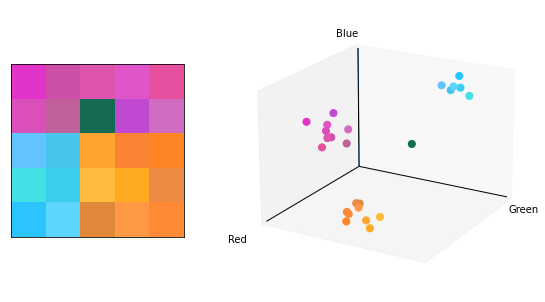

In [37]:
# Affichage

fig = plt.figure(figsize=(8,4), facecolor='w')

# Image
ax = fig.add_subplot(1,2,1)
ax.set_position([0.05,0,.3,1])
ax.imshow(img)
ax.set_xticks([])
ax.set_yticks([])

# Affichage 3D
ax = fig.add_subplot(1,2,2,projection='3d')
ax.set_position([.45,0,.5,1])
ax.scatter(x, y, z, marker="o", c=c, s=50, alpha=1)
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
ax.view_init(elev=20, azim=30)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim([0, 256])
ax.set_ylim([0, 256])
ax.set_zlim([0, 256])

ax.xaxis._axinfo['juggled'] = (0,0,0)
ax.yaxis._axinfo['juggled'] = (1,1,1)
ax.zaxis._axinfo['juggled'] = (2,2,2)

ax.plot([0,256], [0,0], [0,0], 'k', linewidth=1)
ax.plot([0,0], [0,256], [0,0], 'k', linewidth=1)
ax.plot([0,0], [0,0], [0,256], [0,0], 'k', linewidth=1)

plt.savefig("3d-space.svg")
plt.show()